Create a file named ```.env``` in the root directory of your Jupyter notebook and add your API key from [Google AI Studio](https://aistudio.google.com/app/apikey)

In [ ]:
!pip install -q -U google-genai

In [ ]:
!pip install openai

In [2]:
import os
import google.generativeai as genai
from dotenv import load_dotenv

load_dotenv()

gemini_api_key = os.getenv("GEMINI_API_KEY")

c:\ProgramData\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
client = genai.Client(api_key="gemini_api_key")

response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents="будь моим асисстентом, который будет мне говорить сколько нужно врмени на решение задачи, которую тебе напишу. Тебе надо разбить на пункты и под пункты, для ее решения. Примерно сколько нужжно потратить на каждую задачу времени и сосьтавить календарь на выполнения полностью всех задач. Попробуй описать задачу построить одноэтажный дом",
)

print(response.text)

In [8]:
from datetime import datetime, timedelta, timezone

# Function for formatting time in ISO 8601
def iso_format(dt):
    return dt.astimezone(timezone.utc).isoformat().replace('+00:00', 'Z')

# Task decomposition function
def decompose_task(task_description):
    prompt = f"""
        Decompose the following task into smaller, manageable subtasks. 
        For each subtask, provide a title, a brief description, an estimated time to complete in hours, 
        a complexity level (Easy, Medium, or Hard), and a due date in YYYY-MM-DD format.  
        Format the output as a JSON object with a "task" key (original task description) 
        and a "subtasks" key containing a list of subtask objects.  

        Example subtask object: 
        {{
            "title": "Research AI trends", 
            "description": "Conduct research on current AI trends", 
            "estimated_time": "8 hours", 
            "complexity": "Medium", 
            "due_date": "2024-01-29"
        }}

        Task: {task_description}
    """

    response = model.generate_content(prompt)

    return response.text



In [4]:

genai.configure(api_key=os.environ["gemini_api_key"])

# Model configuration
generation_config = {
    "temperature": 1,
    "top_p": 0.95,
    "top_k": 40,
    "response_mime_type": "text/plain",
}

# Model initialization
model = genai.GenerativeModel(
    model_name="gemini-2.0-flash",
    generation_config=generation_config,
)

task_description = "Create popular YouTube channel"

raw_response = decompose_task(task_description)

raw_response

'```json\n{\n  "task": "Create popular YouTube channel",\n  "subtasks": [\n    {\n      "title": "Define Channel Niche and Target Audience",\n      "description": "Determine the channel\'s core subject matter (e.g., gaming, cooking, education) and the specific demographic it will target. Research competitor channels within that niche.",\n      "estimated_time": "4 hours",\n      "complexity": "Medium",\n      "due_date": "2024-03-04"\n    },\n    {\n      "title": "Conduct Keyword Research",\n      "description": "Identify relevant keywords and search terms that the target audience uses to find content related to the channel\'s niche.  Use tools like Google Keyword Planner and TubeBuddy.",\n      "estimated_time": "6 hours",\n      "complexity": "Medium",\n      "due_date": "2024-03-06"\n    },\n    {\n      "title": "Develop a Content Strategy",\n      "description": "Plan a series of video topics based on keyword research and target audience interests.  Create a content calendar with

In [5]:
import json

def print_raw_response(response):
    try:
        data = json.loads(response)

        for subtask in data.get('subtasks', []):
            try:
                due_date_str = subtask.get('due_date')
                due_date = datetime.strptime(due_date_str, '%Y-%m-%d')
                start_time = due_date.replace(hour=9, minute=0, second=0)
                estimated_time_hours = int(subtask.get('estimated_time').split(' ')[0])
                end_time = start_time + timedelta(hours=estimated_time_hours)

                subtask['calendar_event_details'] = {
                    "summary": subtask['title'],
                    "description": subtask['description'],
                    "start": iso_format(start_time),
                    "end": iso_format(end_time)
                }
            except ValueError as e:
                print(f"Ошибка парсинга даты: {e}")
                subtask['calendar_event_details'] = None

        print(json.dumps(data, indent=4))
        return data

    except json.JSONDecodeError as e:
        print(f"Ошибка обработки JSON: {e}")
        print("Сырой ответ модели:", raw_response)


Попробуем заставить нашу модель выдастьответ уже в требуемомо json формате

In [ ]:
generation_config = {
    "temperature": 1,
    "top_p": 0.95,
    "top_k": 40,
    "response_mime_type": "application/json",
}

model = genai.GenerativeModel(
    model_name="gemini-2.0-flash",
    generation_config=generation_config,
)

# let's change the promptness
def decompose_task(task_description):
    prompt = f"""
        Decompose the following task into smaller, manageable subtasks. 
        For each subtask, provide a title, a brief description, an estimated time to complete in hours, 
        a complexity level (Easy, Medium, or Hard), and a due date in YYYY-MM-DD format.  
        Format the output as a JSON object with a "task" key (original task description) 
        and a "subtasks" key containing a list of subtask objects.  

        Example subtask object: 
        {{
            "title": str, 
            "description": str, 
            "estimated_time": str, 
            "complexity": str, 
            "due_date": data
        }}

        Task: {task_description}
    """

    response = model.generate_content(prompt)

    return response.text


raw_response = decompose_task(task_description)
raw_response

'{\n  "task": "Create popular YouTube channel",\n  "subtasks": [\n    {\n      "title": "Market Research and Niche Selection",\n      "description": "Identify a profitable and engaging niche based on market trends and personal interest. Analyze existing channels and content in the chosen niche.",\n      "estimated_time": "8",\n      "complexity": "Medium",\n      "due_date": "2024-01-29"\n    },\n    {\n      "title": "Channel Branding and Setup",\n      "description": "Develop a channel name, logo, banner art, and create channel description. Optimize the channel for search engines.",\n      "estimated_time": "6",\n      "complexity": "Medium",\n      "due_date": "2024-02-05"\n    },\n    {\n      "title": "Content Planning and Scripting",\n      "description": "Generate a list of initial video ideas. Create detailed scripts and outlines for the first 5 videos.",\n      "estimated_time": "12",\n      "complexity": "Medium",\n      "due_date": "2024-02-12"\n    },\n    {\n      "title":

In [9]:
print_raw_response(raw_response)

{
    "task": "Create popular YouTube channel",
    "subtasks": [
        {
            "title": "Market Research and Niche Selection",
            "description": "Identify a profitable and engaging niche based on market trends and personal interest. Analyze existing channels and content in the chosen niche.",
            "estimated_time": "8",
            "complexity": "Medium",
            "due_date": "2024-01-29",
            "calendar_event_details": {
                "summary": "Market Research and Niche Selection",
                "description": "Identify a profitable and engaging niche based on market trends and personal interest. Analyze existing channels and content in the chosen niche.",
                "start": "2024-01-29T06:00:00Z",
                "end": "2024-01-29T14:00:00Z"
            }
        },
        {
            "title": "Channel Branding and Setup",
            "description": "Develop a channel name, logo, banner art, and create channel description. Optimize t

{'task': 'Create popular YouTube channel',
 'subtasks': [{'title': 'Market Research and Niche Selection',
   'description': 'Identify a profitable and engaging niche based on market trends and personal interest. Analyze existing channels and content in the chosen niche.',
   'estimated_time': '8',
   'complexity': 'Medium',
   'due_date': '2024-01-29',
   'calendar_event_details': {'summary': 'Market Research and Niche Selection',
    'description': 'Identify a profitable and engaging niche based on market trends and personal interest. Analyze existing channels and content in the chosen niche.',
    'start': '2024-01-29T06:00:00Z',
    'end': '2024-01-29T14:00:00Z'}},
  {'title': 'Channel Branding and Setup',
   'description': 'Develop a channel name, logo, banner art, and create channel description. Optimize the channel for search engines.',
   'estimated_time': '6',
   'complexity': 'Medium',
   'due_date': '2024-02-05',
   'calendar_event_details': {'summary': 'Channel Branding and 

### Change promt text

In [10]:
task_description = "promote your own YouTube channel on embedded microcontroller development"
prompt = f"""
       Decompose the following task into smaller, manageable subtasks.  
        For each subtask, decompose it further into microtasks where possible.  
        Ensure each subtask and microtask has:
        - A title
        - A brief description
        - An estimated time to complete (in hours)
        - A complexity level (Easy, Medium, or Hard)
        - A due date in YYYY-MM-DD format  

        Format the output as a JSON object with:
        - "task" key (original task description)
        - "subtasks" key containing a list of subtask objects
        - Each subtask can contain a "microtasks" key (list of microtask objects)  

        Example JSON output: 
        {{
            "task": "",
            "subtasks": [
                {{
                    "title": "",
                    "description": "",
                    "estimated_time": "4",
                    "complexity": "Medium",
                    "due_date": "2024-11-01",
                    "microtasks": [
                        {{
                            "title": "",
                            "description": "",
                            "estimated_time": "2",
                            "complexity": "Easy",
                            "due_date": "2024-10-30"
                        }},
                        {{
                            "title": "",
                            "description": "",
                            "estimated_time": "2",
                            "complexity": "Medium",
                            "due_date": "2024-10-31"
                        }}
                    ]
                }}
            ]
        }}
        Task: {task_description}
    """
response = model.generate_content(prompt)

In [11]:
data_json = print_raw_response(response.text)

{
    "task": "promote your own YouTube channel on embedded microcontroller development",
    "subtasks": [
        {
            "title": "Define Target Audience and Content Pillars",
            "description": "Identify the specific audience interested in embedded microcontroller development and define key content pillars that will attract and retain them.",
            "estimated_time": "4",
            "complexity": "Medium",
            "due_date": "2024-12-01",
            "microtasks": [
                {
                    "title": "Research Target Audience",
                    "description": "Analyze demographics, interests, and online behavior of potential viewers (e.g., students, hobbyists, professionals).",
                    "estimated_time": "1",
                    "complexity": "Easy",
                    "due_date": "2024-11-27"
                },
                {
                    "title": "Identify Content Pillars",
                    "description": "Determine

### Let's create a graph event for each subtask and microtask

In [ ]:
!pip install -U matplotlib pandas

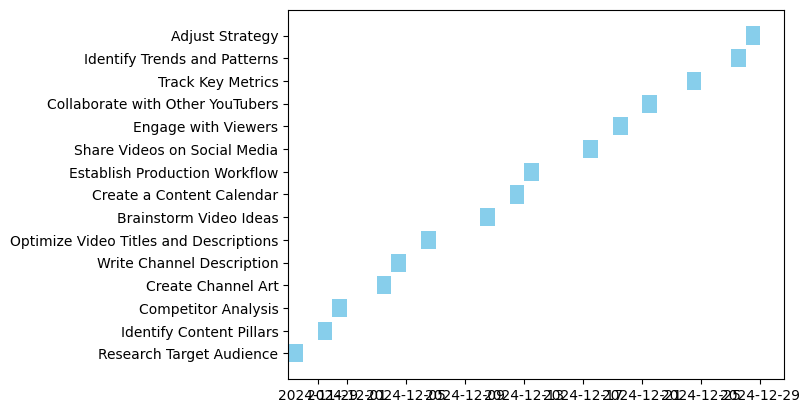

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import matplotlib.dates as mdates


for task in data_json['subtasks']:
    for microtask in task.get('microtasks', []):
        if microtask.get('due_date'):
            due_date = datetime.datetime.strptime(microtask['due_date'], '%Y-%m-%d')
            plt.barh(microtask['title'], 1, left=due_date, color='skyblue')

In [ ]:
subtasks_list = []

for task in data_json['subtasks']:
    for microtask in task['microtasks']:
        subtasks_list.append({
            'Task Title': task['title'],
            'Task Description': task['description'],
            'Task Estimated Time': task['estimated_time'],
            'Task Complexity': task['complexity'],
            'Task Due Date': task['due_date'],
            'Microtask Title': microtask['title'],
            'Microtask Description': microtask['description'],
            'Microtask Estimated Time': microtask['estimated_time'],
            'Microtask Complexity': microtask['complexity'],
            'Microtask Due Date': microtask['due_date']
        })

df = pd.DataFrame(subtasks_list)

df['Task Due Date'] = pd.to_datetime(df['Task Due Date'])
df['Microtask Due Date'] = pd.to_datetime(df['Microtask Due Date'])

In [64]:
df

,Task Title,Task Description,Task Estimated Time,Task Complexity,Task Due Date,Microtask Title,Microtask Description,Microtask Estimated Time,Microtask Complexity,Microtask Due Date
0,Define Target Audience and Content Pillars,Identify the specific audience interested in e...,4,Medium,2024-12-01,Research Target Audience,"Analyze demographics, interests, and online be...",1,Easy,2024-11-27
1,Define Target Audience and Content Pillars,Identify the specific audience interested in e...,4,Medium,2024-12-01,Identify Content Pillars,Determine 3-5 core themes for your channel (e....,2,Medium,2024-11-29
2,Define Target Audience and Content Pillars,Identify the specific audience interested in e...,4,Medium,2024-12-01,Competitor Analysis,Identify similar YouTube channels and analyze ...,1,Easy,2024-11-30
3,Optimize YouTube Channel,Enhance the channel's appearance and searchabi...,6,Medium,2024-12-08,Create Channel Art,Design a visually appealing banner and profile...,2,Medium,2024-12-03
4,Optimize YouTube Channel,Enhance the channel's appearance and searchabi...,6,Medium,2024-12-08,Write Channel Description,Craft a compelling and keyword-rich descriptio...,1,Easy,2024-12-04
5,Optimize YouTube Channel,Enhance the channel's appearance and searchabi...,6,Medium,2024-12-08,Optimize Video Titles and Descriptions,Implement keyword research to optimize video t...,3,Medium,2024-12-06
6,Develop a Content Calendar and Production Sche...,Plan and schedule video releases to maintain a...,4,Medium,2024-12-15,Brainstorm Video Ideas,Generate a list of potential video topics base...,1,Easy,2024-12-10
7,Develop a Content Calendar and Production Sche...,Plan and schedule video releases to maintain a...,4,Medium,2024-12-15,Create a Content Calendar,"Schedule video releases for the next month, co...",2,Medium,2024-12-12
8,Develop a Content Calendar and Production Sche...,Plan and schedule video releases to maintain a...,4,Medium,2024-12-15,Establish Production Workflow,Outline the steps involved in creating each vi...,1,Easy,2024-12-13
9,Promote Channel and Videos,Utilize various online platforms and strategie...,8,Medium,2024-12-22,Share Videos on Social Media,"Promote new videos on platforms like Twitter, ...",2,Easy,2024-12-17


In [ ]:
from IPython.display import Markdown, display

grouped_df = df.groupby('Task Title')

def color_complexity(complexity):
    if complexity == "Easy":
        return 'green'
    elif complexity == "Medium":
        return 'orange'
    elif complexity == "Hard":
        return 'red'
    else:
        return 'blue'

output = ""
for task_title, group in grouped_df:
    group = group.sort_values(by='Task Due Date')

    start_date = group['Task Due Date'].min().date()
    end_date = group['Task Due Date'].max().date()
    output += f"### {task_title}\n"
    output += f"**Duration:** {group['Microtask Due Date'].min().date()} - {group['Microtask Due Date'].max().date()} \n"
    output += f"**Microtasks:**\n"
    for index, row in group.iterrows():
        color = color_complexity(row['Microtask Complexity'])
        output += f"- **{row['Microtask Title']}** (_Complexity:_ <span style='color:{color}'>{row['Microtask Complexity']}</span>)\n"
        output += f"  - Description: {row['Microtask Description']}\n"
        output += f"  - Start Date: {row['Task Due Date']}\n"
        output += f"  - End Date: {row['Microtask Due Date']}\n"
    output += "\n"

from IPython.display import Markdown, display
display(Markdown(output))

### Analyze Performance and Iterate
**Duration:** 2024-12-24 - 2024-12-28 
**Microtasks:**
- **Track Key Metrics** (_Complexity:_ <span style='color:green'>Easy</span>)
  - Description: Monitor metrics like views, watch time, subscriber growth, and engagement rate using YouTube Analytics.
  - Start Date: 2024-12-29 00:00:00
  - End Date: 2024-12-24 00:00:00
- **Identify Trends and Patterns** (_Complexity:_ <span style='color:orange'>Medium</span>)
  - Description: Analyze the data to identify which types of videos perform best and which promotional strategies are most effective.
  - Start Date: 2024-12-29 00:00:00
  - End Date: 2024-12-27 00:00:00
- **Adjust Strategy** (_Complexity:_ <span style='color:orange'>Medium</span>)
  - Description: Use insights to adjust your content calendar, video topics, and promotional efforts to optimize channel performance.
  - Start Date: 2024-12-29 00:00:00
  - End Date: 2024-12-28 00:00:00

### Define Target Audience and Content Pillars
**Duration:** 2024-11-27 - 2024-11-30 
**Microtasks:**
- **Research Target Audience** (_Complexity:_ <span style='color:green'>Easy</span>)
  - Description: Analyze demographics, interests, and online behavior of potential viewers (e.g., students, hobbyists, professionals).
  - Start Date: 2024-12-01 00:00:00
  - End Date: 2024-11-27 00:00:00
- **Identify Content Pillars** (_Complexity:_ <span style='color:orange'>Medium</span>)
  - Description: Determine 3-5 core themes for your channel (e.g., beginner tutorials, advanced projects, specific microcontroller platforms).
  - Start Date: 2024-12-01 00:00:00
  - End Date: 2024-11-29 00:00:00
- **Competitor Analysis** (_Complexity:_ <span style='color:green'>Easy</span>)
  - Description: Identify similar YouTube channels and analyze their successful content and promotion strategies.
  - Start Date: 2024-12-01 00:00:00
  - End Date: 2024-11-30 00:00:00

### Develop a Content Calendar and Production Schedule
**Duration:** 2024-12-10 - 2024-12-13 
**Microtasks:**
- **Brainstorm Video Ideas** (_Complexity:_ <span style='color:green'>Easy</span>)
  - Description: Generate a list of potential video topics based on your content pillars and target audience interests.
  - Start Date: 2024-12-15 00:00:00
  - End Date: 2024-12-10 00:00:00
- **Create a Content Calendar** (_Complexity:_ <span style='color:orange'>Medium</span>)
  - Description: Schedule video releases for the next month, considering holidays, trending topics, and audience availability.
  - Start Date: 2024-12-15 00:00:00
  - End Date: 2024-12-12 00:00:00
- **Establish Production Workflow** (_Complexity:_ <span style='color:green'>Easy</span>)
  - Description: Outline the steps involved in creating each video, including scripting, filming, editing, and uploading.
  - Start Date: 2024-12-15 00:00:00
  - End Date: 2024-12-13 00:00:00

### Optimize YouTube Channel
**Duration:** 2024-12-03 - 2024-12-06 
**Microtasks:**
- **Create Channel Art** (_Complexity:_ <span style='color:orange'>Medium</span>)
  - Description: Design a visually appealing banner and profile picture that represent your channel's brand.
  - Start Date: 2024-12-08 00:00:00
  - End Date: 2024-12-03 00:00:00
- **Write Channel Description** (_Complexity:_ <span style='color:green'>Easy</span>)
  - Description: Craft a compelling and keyword-rich description that explains your channel's focus and value proposition.
  - Start Date: 2024-12-08 00:00:00
  - End Date: 2024-12-04 00:00:00
- **Optimize Video Titles and Descriptions** (_Complexity:_ <span style='color:orange'>Medium</span>)
  - Description: Implement keyword research to optimize video titles and descriptions for improved search visibility.
  - Start Date: 2024-12-08 00:00:00
  - End Date: 2024-12-06 00:00:00

### Promote Channel and Videos
**Duration:** 2024-12-17 - 2024-12-21 
**Microtasks:**
- **Share Videos on Social Media** (_Complexity:_ <span style='color:green'>Easy</span>)
  - Description: Promote new videos on platforms like Twitter, LinkedIn, and Facebook to reach a wider audience.
  - Start Date: 2024-12-22 00:00:00
  - End Date: 2024-12-17 00:00:00
- **Engage with Viewers** (_Complexity:_ <span style='color:orange'>Medium</span>)
  - Description: Respond to comments, answer questions, and participate in relevant online communities to build relationships with viewers.
  - Start Date: 2024-12-22 00:00:00
  - End Date: 2024-12-19 00:00:00
- **Collaborate with Other YouTubers** (_Complexity:_ <span style='color:orange'>Medium</span>)
  - Description: Partner with other creators in the embedded systems niche to cross-promote content and reach new audiences.
  - Start Date: 2024-12-22 00:00:00
  - End Date: 2024-12-21 00:00:00



In [81]:
import calendar 

yy = 2017
mm = 11
print(calendar.month(yy, mm)) 


   November 2017
Mo Tu We Th Fr Sa Su
       1  2  3  4  5
 6  7  8  9 10 11 12
13 14 15 16 17 18 19
20 21 22 23 24 25 26
27 28 29 30



In [76]:
selected_columns = ['Task Title', 'Microtask Title', 'Task Due Date', 'Microtask Due Date']
df_selected = df.loc[:, selected_columns]

df_selected


,Task Title,Microtask Title,Task Due Date,Microtask Due Date
0,Define Target Audience and Content Pillars,Research Target Audience,2024-12-01,2024-11-27
1,Define Target Audience and Content Pillars,Identify Content Pillars,2024-12-01,2024-11-29
2,Define Target Audience and Content Pillars,Competitor Analysis,2024-12-01,2024-11-30
3,Optimize YouTube Channel,Create Channel Art,2024-12-08,2024-12-03
4,Optimize YouTube Channel,Write Channel Description,2024-12-08,2024-12-04
5,Optimize YouTube Channel,Optimize Video Titles and Descriptions,2024-12-08,2024-12-06
6,Develop a Content Calendar and Production Sche...,Brainstorm Video Ideas,2024-12-15,2024-12-10
7,Develop a Content Calendar and Production Sche...,Create a Content Calendar,2024-12-15,2024-12-12
8,Develop a Content Calendar and Production Sche...,Establish Production Workflow,2024-12-15,2024-12-13
9,Promote Channel and Videos,Share Videos on Social Media,2024-12-22,2024-12-17


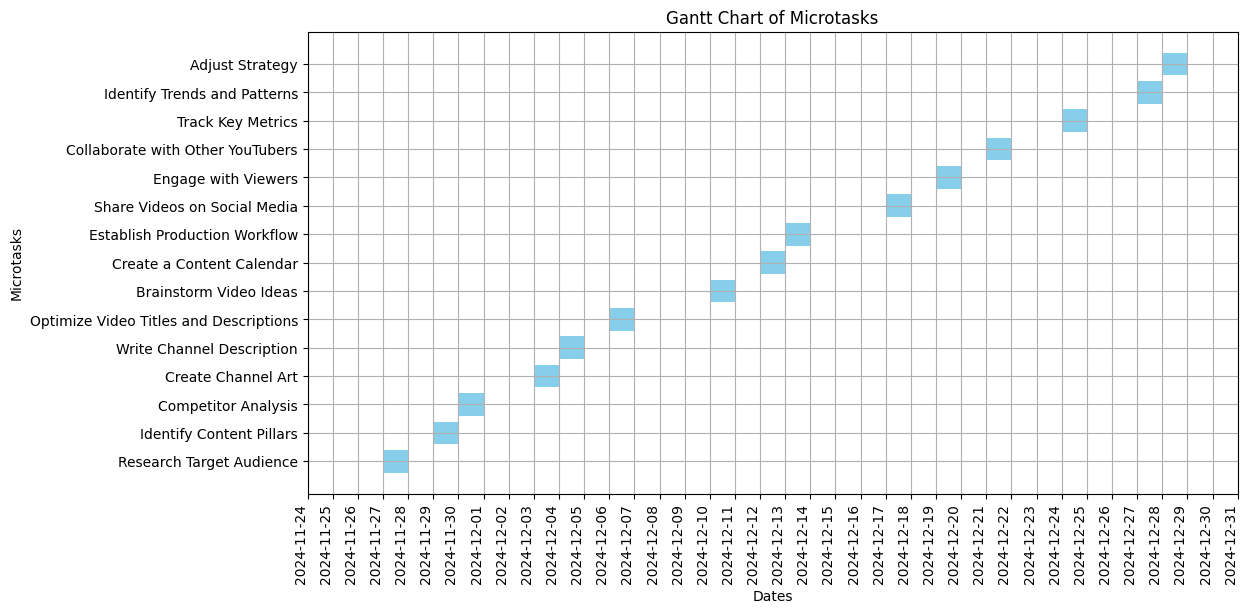

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

for idx, row in df.iterrows():
    ax.barh(row['Microtask Title'], 1, left=row['Microtask Due Date'], color='skyblue')

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

start_date = df['Microtask Due Date'].min() - pd.Timedelta(days=3)  
end_date = df['Microtask Due Date'].max() + pd.Timedelta(days=3)
ax.set_xlim(start_date, end_date)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right")

plt.xlabel('Dates')
plt.ylabel('Microtasks')
plt.title('Gantt Chart of Microtasks')
plt.grid(True)

plt.show()